In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

tf.random.set_seed(42)
np.random.seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:


print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [5]:

print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


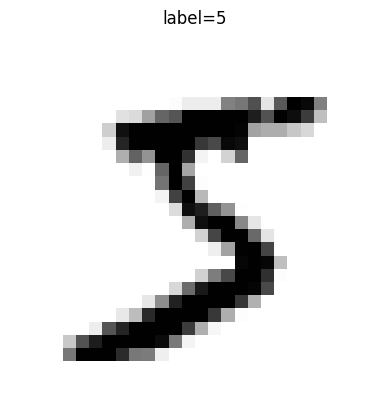

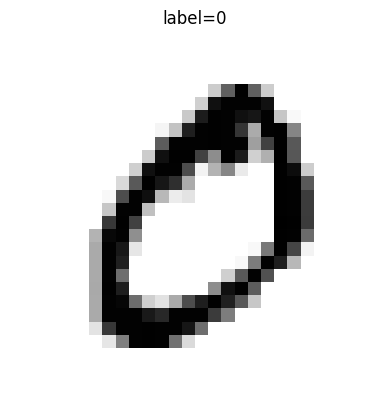

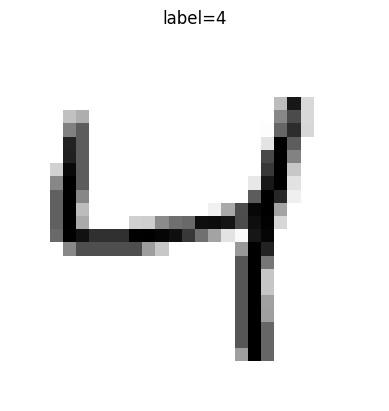

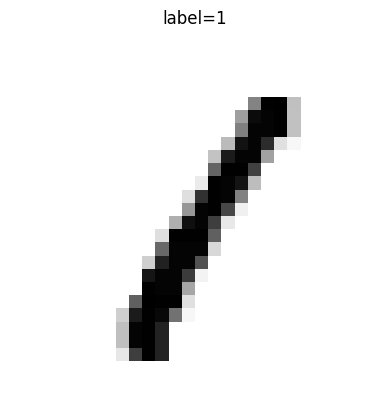

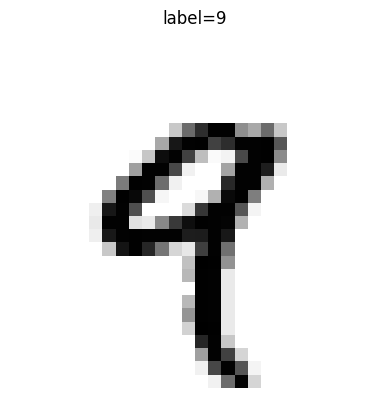

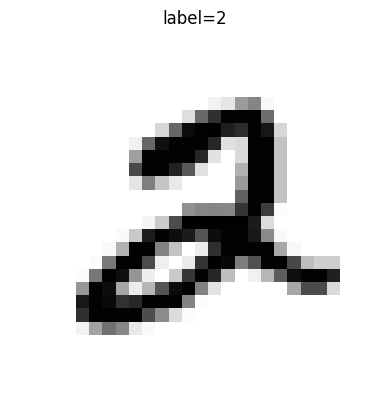

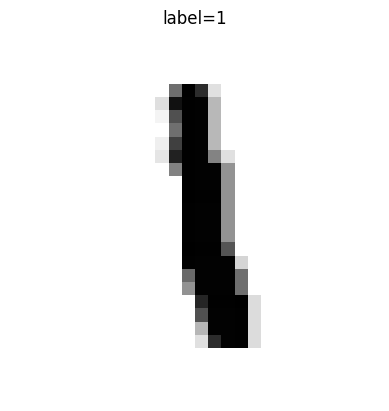

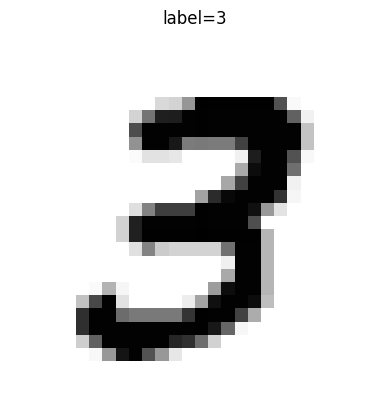

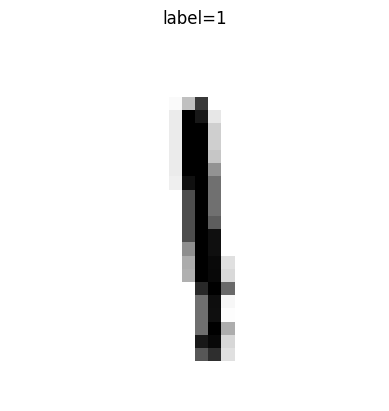

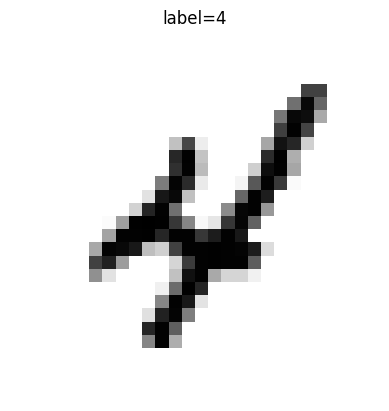

In [6]:
for i in range(10):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(f"label={y_train[i]}")
    plt.axis("off")
    plt.show()

In [7]:
x_train = x_train[..., np.newaxis].astype("float32") / 255.0
x_test  = x_test[...,  np.newaxis].astype("float32") / 255.0

In [8]:
print("Training sample after normalizing (min,max):",
      float(x_train[0].min()), float(x_train[0].max()))
print("Testing sample after normalizing (min,max):",
      float(x_test[0].min()), float(x_test[0].max()))

Training sample after normalizing (min,max): 0.0 1.0
Testing sample after normalizing (min,max): 0.0 1.0


In [9]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32,  activation="relu"),
    layers.Dense(10,  activation="softmax"),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,658 (436.16 KB)

 Trainable params: 111,402 (435.16 KB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8101 - loss: 0.6218 - val_accuracy: 0.9553 - val_loss: 0.1471
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9405 - loss: 0.1969 - val_accuracy: 0.9659 - val_loss: 0.1161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9570 - loss: 0.1434 - val_accuracy: 0.9659 - val_loss: 0.1154
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9638 - loss: 0.1204 - val_accuracy: 0.9701 - val_loss: 0.1067
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9691 - loss: 0.1015 - val_accuracy: 0.9694 - val_loss: 0.1109
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9722 - loss: 0.0879 - val_accuracy: 0.9707 - val_loss: 0.1136
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9761 - loss: 0.0770 - val_accuracy: 0.9730 - val_loss: 0.1030
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9785 - loss: 0.0695

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.08436883985996246
Test accuracy: 0.9790999889373779


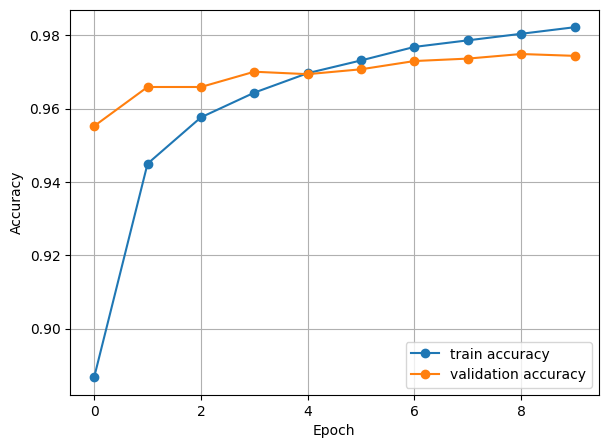

In [13]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

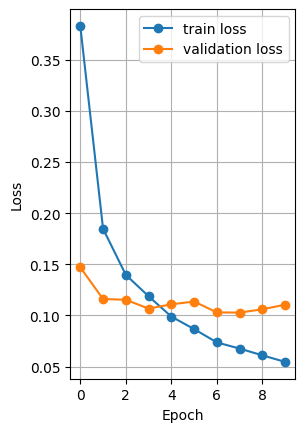

In [14]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
model.save("digit.keras")